# Analyst Builder: Python Programming for Beginners - Project 4

## Automated Crypto Web Scraper Project

In [ ]:
# Setup

from bs4 import BeautifulSoup
import requests

url = 'https://coinmarketcap.com/currencies/bitcoin/'

page = requests.get(url)
page

<Response [200]>

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <link href="/manifest.json" rel="manifest"/>
  <script type="application/ld+json">
   {"@context":"https://schema.org/","@type":"Product","name":"Bitcoin","aggregateRating":{"@type":"AggregateRating","ratingValue":4.6,"bestRating":5,"ratingCount":3,"itemReviewed":""}}
  </script>
  <meta content="https://coinmarketcap.com/currencies/bitcoin/" property="og:url"/>
  <link href="https://coinmarketcap.com/currencies/bitcoin/" rel="canonical"/>
  <link href="https://coinmarketcap.com/ar/currencies/bitcoin/" hreflang="ar" rel="alternate"/>
  <link href="https://coinmarketcap.com/bg/currencies/bitcoin/" hreflang="bg" rel="alternate"/>
  <link href="https://coinmarketcap.com/cs/currencies/bitcoin/" hreflang="cs" rel="alternate"/>
  <link
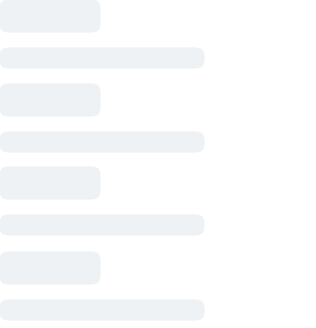

In [ ]:
soup = BeautifulSoup(page.text, 'html')
print(soup.prettify())

In [ ]:
crypto_title_html = soup.find('span', {'class': 'sc-65e7f566-0 lsTl'}) # Find the HTML span containing the crypto title
print(crypto_title_html)

crypto_title = soup.find('span', {'class': 'sc-65e7f566-0 lsTl'}).text.split()[0] # Extract only the title text ('Bitcoin')
print(crypto_title)

<span class="sc-65e7f566-0 lsTl" data-role="coin-name" title="Bitcoin">Bitcoin<span class="sc-65e7f566-0 eQBACe coin-name-mobile"> price</span></span>
Bitcoin


In [ ]:
crypto_price_html = soup.find('div', {'class': 'sc-65e7f566-0 czwNaM flexStart alignBaseline'}) # Find the HTML div containing the crypto price
print(crypto_price_html)

crypto_price = soup.find('div', {'class': 'sc-65e7f566-0 czwNaM flexStart alignBaseline'}).text.split()[0] # Extract only the price text
print(crypto_price)

crypto_price_final = crypto_price.replace('$','') # Replace '$' symbol from price
print(crypto_price_final)

<div class="sc-65e7f566-0 czwNaM flexStart alignBaseline" data-role="el"><span class="sc-65e7f566-0 WXGwg base-text" data-test="text-cdp-price-display">$67,976.11</span>  <div class="sc-65e7f566-0 enCfYh"><div class="sc-4c05d6ef-0 sc-b016a83b-0 dlQYLv lbatIg" data-role="percentage-value" data-sensors-click="true"><p class="sc-71024e3e-0 sc-b016a83b-1 ihXFUo fHoCwN change-text" color="red" data-change="down" data-sensors-click="true" font-size="1"><svg class="sc-4c05d6ef-0 dMwnWW" fill="currentColor" height="24px" style="height:14px;width:14px" viewbox="0 0 24 24" width="24px" xmlns="http://www.w3.org/2000/svg"><path d="M18.0566 8H5.94336C5.10459 8 4.68455 9.02183 5.27763 9.61943L11.3343 15.7222C11.7019 16.0926 12.2981 16.0926 12.6657 15.7222L18.7223 9.61943C19.3155 9.02183 18.8954 8 18.0566 8Z"></path></svg>2.10%<!-- --> (<!-- -->1d<!-- -->)</p></div></div></div>
$67,976.11
67,976.11


In [ ]:
# Setup
import pandas as pd
from datetime import datetime

date_time = datetime.now() # Capture the current date and time
print(date_time)

crypto_dict = {'Name': crypto_title, # Dictionary to store the extracted data
               'Price': crypto_price_final,
               'TimeStamp': date_time}

crypto_df = pd.DataFrame([crypto_dict]) # pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
crypto_df # Convert dictionary to a DataFrame

2024-11-03 19:16:29.994156


,Name,Price,TimeStamp
0,Bitcoin,"67,976.11",2024-11-03 19:16:29.994156


In [ ]:
# Setup
import os
from google.colab import drive # importing drive module to access Google Drive
drive.mount('/content/drive') # mounting Google Drive to Colab environment, enabling read/write access

Mounted at /content/drive


In [ ]:
new_folder_path = '/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project' # Creating a new folder for project
os.makedirs(new_folder_path, exist_ok=True)

In [ ]:
crypto_df.to_csv('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv')

In [ ]:
# Check if CSV exists, then append or create a new file
if os.path.exists('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv'):
  crypto_df.to_csv('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv', mode='a', header=False, index=False) # Append data without header
else:
  crypto_df.to_csv('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv') # Write data with header if new file

### Final Code:

In [ ]:
# Setup

from bs4 import BeautifulSoup
from google.colab import drive
from datetime import datetime
import requests
import os
import pandas as pd
import time

In [ ]:
# Putting it all together

def automated_crypto_pull(): # Creating a function to automate process

  # Setting up environment
  url = 'https://coinmarketcap.com/currencies/bitcoin/'
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'html')

  # Web Scraping: Extracting data from website
  crypto_title = soup.find('span', {'class': 'sc-65e7f566-0 lsTl'}).text.split()[0]
  crypto_price = soup.find('div', {'class': 'sc-65e7f566-0 czwNaM flexStart alignBaseline'}).text.split()[0]
  crypto_price_final = crypto_price.replace('$','')
  date_time = datetime.now()

  # Creating a df and plugging into web scraped data
  crypto_dict = {'Name': crypto_title,
                'Price': crypto_price_final,
                'TimeStamp': date_time}

  crypto_df = pd.DataFrame([crypto_dict])

  # Check if CSV exists. If it does not exist, create new csv file. If it does exist, append data
  if os.path.exists('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv'):
    crypto_df.to_csv('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv', mode='a', header=False, index=False)
  else:
    crypto_df.to_csv('/content/drive/MyDrive/Analyst Builder/Automated Crypto Web Scraper Project/Bitcoin Price Data.csv', index=False)
  print(crypto_df)

In [ ]:
# Loop for automated data pull with a 10-second delay

while True:
  automated_crypto_pull() # Run the function to pull data
  time.sleep(10) # Wait 10 seconds before the next pull

      Name      Price                  TimeStamp
0  Bitcoin  68,612.49 2024-11-03 19:44:47.210086
      Name      Price                  TimeStamp
0  Bitcoin  68,612.49 2024-11-03 19:44:57.347822
      Name      Price                  TimeStamp
0  Bitcoin  68,612.49 2024-11-03 19:45:07.522392
      Name      Price                  TimeStamp
0  Bitcoin  68,612.49 2024-11-03 19:45:17.688690
      Name      Price                  TimeStamp
0  Bitcoin  68,609.53 2024-11-03 19:45:27.849078


KeyboardInterrupt: 